In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv("50_Startups.csv")
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
df.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [4]:
df["State"].unique()

array(['New York', 'California', 'Florida'], dtype=object)

<Axes: xlabel='Marketing Spend', ylabel='Density'>

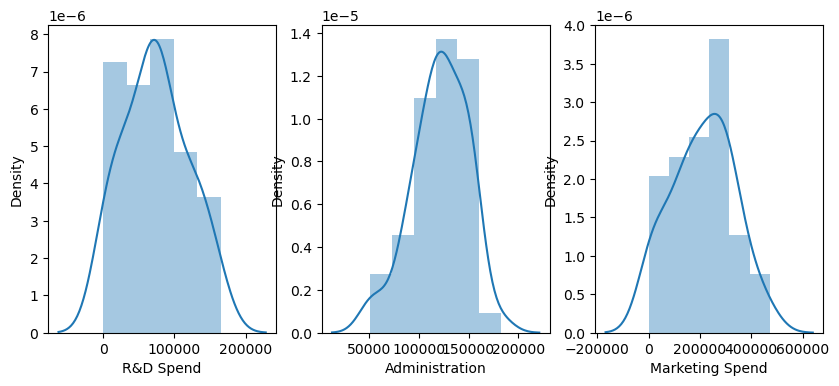

In [5]:
warnings.filterwarnings("ignore")
plt.figure(figsize = (10,4))

plt.subplot(1,3,1)
sns.distplot(df["R&D Spend"])

plt.subplot(1,3,2)
sns.distplot(df["Administration"])

plt.subplot(1,3,3)
sns.distplot(df["Marketing Spend"])

<Axes: >

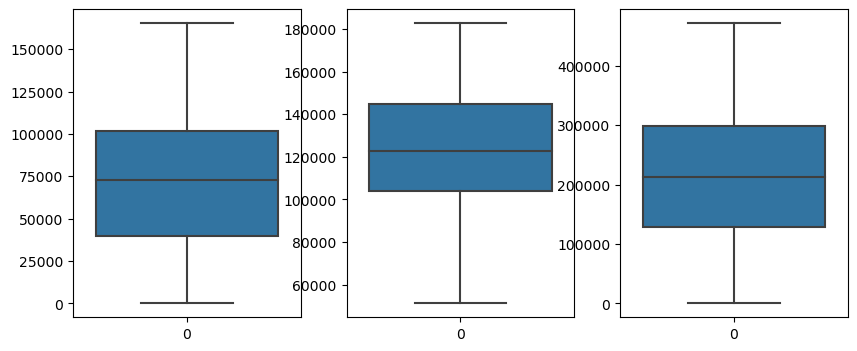

In [6]:
warnings.filterwarnings("ignore")
plt.figure(figsize = (10,4))

plt.subplot(1,3,1)
sns.boxplot(df["R&D Spend"])

plt.subplot(1,3,2)
sns.boxplot(df["Administration"])

plt.subplot(1,3,3)
sns.boxplot(df["Marketing Spend"])

###### No outliers in the independent variables, and these variables follows normal distribution

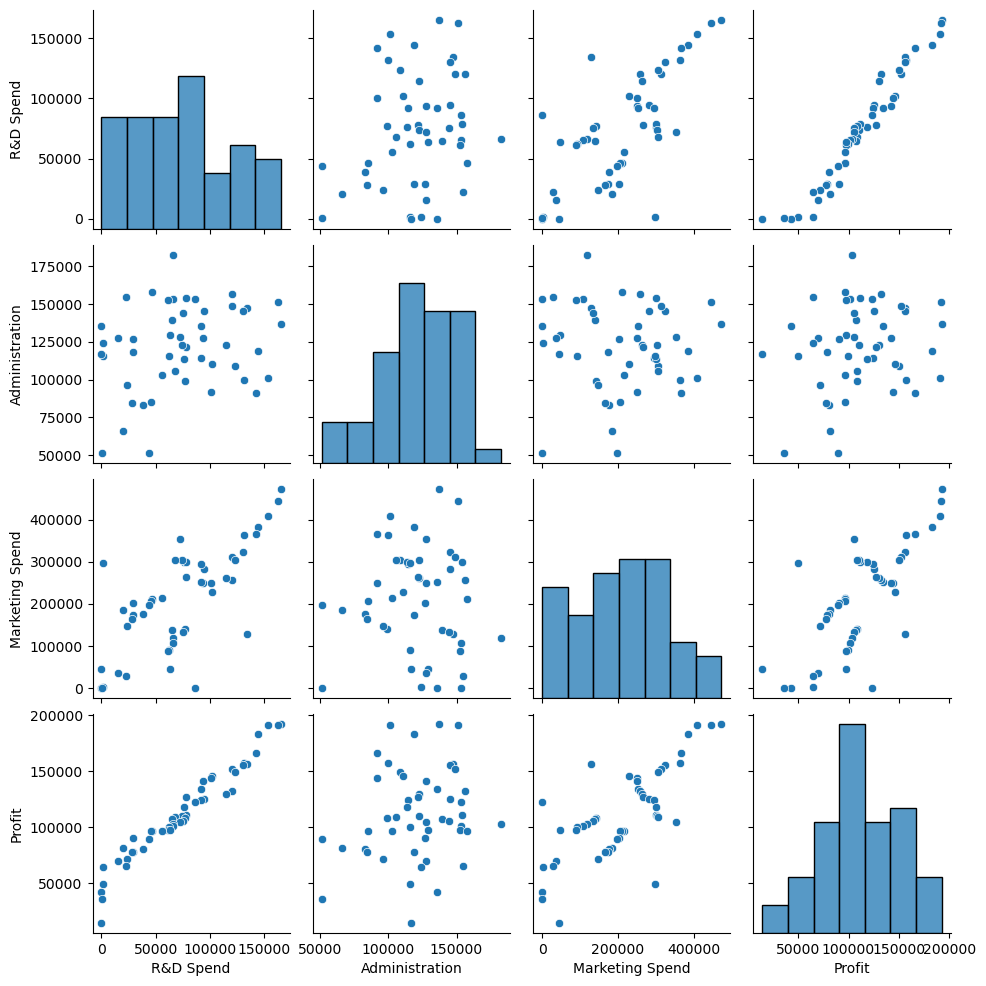

In [7]:
sns.pairplot(df)

###### Not all the variables follow a linear pattern with respect to profit

In [8]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [9]:
df_2 = pd.get_dummies(df,columns=['State'], drop_first= True)
df_2.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,1,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,1,0


In [10]:
y = df_2["Profit"]
x = df_2.drop(["Profit"], axis = 1)

In [11]:
x = sm.add_constant(x)

model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Sun, 23 Jul 2023   Prob (F-statistic):           1.34e-27
Time:                        11:11:25   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            5.013e+04   6884.820      7.281      0.000    3.62e+04     6.4e+04
R&D Spend           0.8060      0.046     17.369      0.000       0.712       0.900
Administration     -0.0270      0.052     -0.517      0.608      -0.132       0.078
Marketing Spend     0.0270      0.017      1.574      0.123      -0.008       0.062
State_Florida     198.7888   3371.007      0.059      0.953   -6595.030    6992.607
State_New York    -41.8870   3256.039     -0.013      0.990   -6604.003    6520.229
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     1.45e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
x_const = sm.add_constant(x)
y_pred = model.predict(x_const)
r_2 = r2_score(y,y_pred)
r_2

0.9507524843355148

###### Using square root transformation

In [13]:
x1 = x.copy()
x1["Administration_sqrt"] = np.sqrt(x["Administration"])
x1["Marketing Spend_sqrt"] = np.sqrt(x["Marketing Spend"])
x1 = x1.drop(["Administration"], axis = 1)
x1 = x1.drop(["Marketing Spend"], axis = 1)
x1.head()


,const,R&D Spend,State_Florida,State_New York,Administration_sqrt,Marketing Spend_sqrt
0,1.0,165349.20,0,1,369.997027,686.865416
1,1.0,162597.70,0,0,389.072731,666.257105
2,1.0,153441.51,1,0,318.033882,638.697534
3,1.0,144372.41,0,1,344.487808,619.031195
4,1.0,142107.34,1,0,302.310718,605.118517


In [14]:
x1 = sm.add_constant(x1)

model = sm.OLS(y, x1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.1
Date:                Sun, 23 Jul 2023   Prob (F-statistic):           1.47e-27
Time:                        11:11:26   Log-Likelihood:                -525.49
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  5.07e+04   1.25e+04      4.053      0.000    2.55e+04    7.59e+04
R&D Spend                0.8145      0.043     19.078      0.000       0.728       0.901
State_Florida          203.7209   3380.637      0.060      0.952   -6609.505    7016.947
State_New York         423.6146   3278.259      0.129      0.898   -6183.283    7030.512
Administration_sqrt    -18.5110     33.984     -0.545      0.589     -87.001      49.979
Marketing Spend_sqrt    17.4909     11.184      1.564      0.125      -5.049      40.031
==============================================================================
Omnibus:                       14.214   Durbin-Watson:                   1.333
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               20.708
Skew:                          -0.898   Prob(JB):                     3.19e-05
Kurtosis:                       5.591   Cond. No.                     8.11e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.11e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
x_const1 = sm.add_constant(x1)
y_pred1 = model.predict(x_const1)
r_2_sqrt = r2_score(y,y_pred1)
r_2_sqrt

0.9505430446185115

###### Using square transformation

In [16]:
x2 = x.copy()
x2["Administration_sq"] = np.square(x["Administration"])
x2["Marketing Spend_sq"] = np.square(x["Marketing Spend"])
x2 = x2.drop(["Administration"], axis = 1)
x2 = x2.drop(["Marketing Spend"], axis = 1)
x2.head()


,const,R&D Spend,State_Florida,State_New York,Administration_sq,Marketing Spend_sq
0,1.0,165349.20,0,1,1.874101e+10,2.225802e+11
1,1.0,162597.70,0,0,2.291517e+10,1.970459e+11
2,1.0,153441.51,1,0,1.023042e+10,1.664106e+11
3,1.0,144372.41,0,1,1.408301e+10,1.468419e+11
4,1.0,142107.34,1,0,8.352456e+09,1.340793e+11


In [17]:
x2 = sm.add_constant(x2)

model = sm.OLS(y, x2).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     166.6
Date:                Sun, 23 Jul 2023   Prob (F-statistic):           2.00e-27
Time:                        11:11:26   Log-Likelihood:                -525.84
No. Observations:                  50   AIC:                             1064.
Df Residuals:                      44   BIC:                             1075.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5.148e+04   4180.021     12.315      0.000    4.31e+04    5.99e+04
R&D Spend              0.8182      0.047     17.355      0.000       0.723       0.913
State_Florida        666.2002   3370.778      0.198      0.844   -6127.156    7459.557
State_New York      -346.4289   3299.698     -0.105      0.917   -6996.534    6303.676
Administration_sq  -1.719e-07   2.23e-07     -0.771      0.445   -6.21e-07    2.78e-07
Marketing Spend_sq  4.704e-08   3.97e-08      1.186      0.242   -3.29e-08    1.27e-07
==============================================================================
Omnibus:                       16.590   Durbin-Watson:                   1.210
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               25.767
Skew:                          -1.029   Prob(JB):                     2.54e-06
Kurtosis:                       5.852   Cond. No.                     2.89e+11
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.89e+11. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
x_const2 = sm.add_constant(x2)
y_pred2 = model.predict(x_const2)
r_2_sq = r2_score(y,y_pred2)
r_2_sq

0.9498390007480275

In [19]:
data = [["No transformation", r_2], ["Square root transformation", r_2_sqrt], ["Square transformation", r_2_sq]]
r2Table = pd.DataFrame(data, columns = ["Transformation", "R-2 score"])
r2Table

,Transformation,R-2 score
0,No transformation,0.950752
1,Square root transformation,0.950543
2,Square transformation,0.949839
